In [3]:
### Project Evaluation Phase 3
print("*************************************")
print(" \033[1m" + "Flip Robo Project Evaluation Phase " + "\033[0m")
print("*************************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*************************************
 Flip Robo Project Evaluation Phase 
*************************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [4]:
print("---------------------------------\n")
print("\033[1m" + "         Census Income\n" + "\033[0m")
print("---------------------------------\n")

---------------------------------

         Census Income

---------------------------------



# Loading Libraries

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, mean_squared_error, recall_score, precision_score, roc_auc_score, make_scorer, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, mean_absolute_error, r2_score, explained_variance_score, max_error, classification_report
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_predict
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV, f_regression, RFE
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import skillsnetwork
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
from tensorflow.keras.models import Sequential
import warnings


# Loading Dataset

In [6]:
# Read the dataset from the 'census_income.csv' file
data = pd.read_csv('census_income.csv')

# About the Data

In [7]:
# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


The dataset appears to be structured for the purpose of predicting an individual's income based on various demographic and employment-related attributes. It contains a mix of categorical and numerical data. This dataset can be used for tasks such as classification and data analysis to understand the factors influencing income levels in the population.

# Data Validation and Quality Check

In [8]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types and formats
data_types = data.dtypes
data_formats = data.applymap(lambda x: isinstance(x, str))

# Check unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object'])
unique_values = categorical_columns.nunique()

# Detect outliers in numeric columns
numeric_columns = data.select_dtypes(exclude=['object'])
outliers = {}

for column in numeric_columns.columns:
    # Define the outlier detection method using z-scores
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    outliers[column] = (z_scores > 3) | (z_scores < -3)

# Check for duplicates
duplicates = data.duplicated().sum()

# Check for class imbalance (for classification tasks)
class_imbalance = data['Income'].value_counts()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nData Types:")
print(data_types)
print("\nData Formats:")
print(data_formats)
print("\nUnique Values in Categorical Columns:")
print(unique_values)
print("\nOutliers:")
print(outliers)
print("\nDuplicates:")
print(duplicates)
print("\nClass Imbalance:")
print(class_imbalance)


Missing Values:
Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Data Types:
Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Data Formats:
         Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0      False       True   False       True          False            True   
1      False       True   False       True          False            True   
2      False       True

Here's a summary of the results from the data validation and quality checks performed on the dataset:

**Missing Values:**
- There are no missing values in any of the columns.

**Data Types:**
- The data types of the columns are as follows:
  - Integer (int64): Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week
  - Object (string): Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country, Income

**Data Formats:**
- The "Data Formats" section checks if each element in the dataset is a string (`True` means it's a string, `False` means it's not). This check doesn't indicate any issues but shows the data formats.

**Unique Values in Categorical Columns:**
- There are varying numbers of unique values in categorical columns, which is expected. For example, the "Education" column has 16 unique values, and the "Income" column has 2 unique values.

**Outliers:**
- Outliers have been detected using z-scores in numeric columns, and it appears that no extreme outliers have been identified in these columns.

**Duplicates:**
- There are 24 duplicate rows in the dataset, indicating that some records are exact duplicates of others.

**Class Imbalance:**
- The "Income" column, which is likely the target variable for a classification task, shows class imbalance. There are 24,719 instances where income is less than or equal to £50,000 (<=50K), and 7,841 instances where income is greater than £50,000 (>50K).

These results provide valuable insights into the quality and characteristics of your dataset, which can guide further data preprocessing and analysis steps. You may want to address duplicates and consider strategies for handling class imbalance if you plan to build a classification model using this dataset.

In [9]:
# Summary statistics for numeric columns
numeric_summary = data.describe()

print('Numeric Summary:')
numeric_summary

Numeric Summary:


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Preprocessing 

In [13]:
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

# Create an empty dictionary to store frequency distribution tables
frequency_tables = {}

# Loop through each categorical column and compute the frequency distribution
for column in categorical_columns:
    frequency_table = data[column].value_counts().reset_index()
    frequency_table.columns = [column, 'Frequency']
    frequency_tables[column] = frequency_table

# Print the frequency distribution tables
for column, table in frequency_tables.items():
    print(f"Frequency Distribution for {column}:")
    print(table)
    print("\n")


Frequency Distribution for Workclass:
           Workclass  Frequency
0            Private      22696
1   Self-emp-not-inc       2541
2          Local-gov       2093
3                  ?       1836
4          State-gov       1297
5       Self-emp-inc       1116
6        Federal-gov        960
7        Without-pay         14
8       Never-worked          7


Frequency Distribution for Education:
        Education  Frequency
0         HS-grad      10501
1    Some-college       7291
2       Bachelors       5354
3         Masters       1723
4       Assoc-voc       1382
5            11th       1175
6      Assoc-acdm       1067
7            10th        933
8         7th-8th        646
9     Prof-school        576
10            9th        514
11           12th        433
12      Doctorate        413
13        5th-6th        333
14        1st-4th        168
15      Preschool         51


Frequency Distribution for Marital_status:
           Marital_status  Frequency
0      Married-civ-spouse  

In [37]:
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

# Create an empty dictionary to store frequency distribution tables
frequency_tables = {}

# Loop through each categorical column and compute the frequency distribution
for column in categorical_columns:
    frequency_table = data[column].value_counts().reset_index()
    frequency_table.columns = [column, 'Frequency']
    
    # Calculate percentage count
    frequency_table['Percentage'] = (frequency_table['Frequency'] / len(data)) * 100
    
    frequency_tables[column] = frequency_table

# Print the frequency distribution tables with percentage count
for column, table in frequency_tables.items():
    print(f"Frequency Distribution for {column}:")
    print(table)
    print("\n")


Frequency Distribution for Workclass:
           Workclass  Frequency  Percentage
0            Private      22696   69.705160
1   Self-emp-not-inc       2541    7.804054
2          Local-gov       2093    6.428133
3                  ?       1836    5.638821
4          State-gov       1297    3.983415
5       Self-emp-inc       1116    3.427518
6        Federal-gov        960    2.948403
7        Without-pay         14    0.042998
8       Never-worked          7    0.021499


Frequency Distribution for Education:
        Education  Frequency  Percentage
0         HS-grad      10501   32.251229
1    Some-college       7291   22.392506
2       Bachelors       5354   16.443489
3         Masters       1723    5.291769
4       Assoc-voc       1382    4.244472
5            11th       1175    3.608722
6      Assoc-acdm       1067    3.277027
7            10th        933    2.865479
8         7th-8th        646    1.984029
9     Prof-school        576    1.769042
10            9th        514   

### Remove rows with '?' in some columns.

The removal of rows with '?' in the specified columns is justified for the following reasons:

1. **Data Integrity:** Rows with '?' represent missing or unknown values in the dataset, specifically in the 'Workclass', 'Occupation', and 'Native_country' columns. These missing values can introduce noise and uncertainty into the analysis.

2. **Imputation Challenge:** Imputing missing values for categorical variables like these can be challenging, as there is no straightforward way to determine the correct values for missing entries. It's not appropriate to assume the mode or any specific category for imputation, as it may lead to biased or inaccurate results.

3. **Analysis Quality:** To ensure the quality of the analysis, it's essential to work with complete and reliable data. Removing rows with missing values ensures that the analysis is based on a more robust dataset.

4. **Transparency:** Removing rows with missing values is a transparent approach. It clearly communicates to stakeholders and readers that observations with unknown or unrecorded information were excluded from the analysis.

5. **Minimal Impact:** The percentage of rows with '?' is relatively small (5.64% for 'Workclass', 5.66% for 'Occupation', and 1.79% for 'Native_country'). Therefore, removing these rows has a minimal impact on the overall dataset size.

In summary, removing rows with '?' in the specified columns enhances the quality and reliability of the dataset for analysis, as it eliminates the challenges associated with imputing these missing values and maintains data integrity.



In [24]:
# Remove rows with unknown values ('?') in specified columns (with stripped spaces)
columns_with_unknown = ['Workclass', 'Occupation', 'Native_country']
for column in columns_with_unknown:
    data[column] = data[column].str.strip()  # Remove leading/trailing spaces
cleaned_data = data[~data[columns_with_unknown].isin(['?']).any(axis=1)]

# Justification for removal
removed_rows = len(data) - len(cleaned_data)
print(f"Removed {removed_rows} rows with unknown values in columns: {', '.join(columns_with_unknown)}")

# Recalculate the frequency distribution for relevant columns
frequency_tables = {}
for column in columns_with_unknown:
    frequency_table = cleaned_data[column].value_counts().reset_index()
    frequency_table.columns = [column, 'Frequency']
    frequency_table['Percentage'] = (frequency_table['Frequency'] / len(cleaned_data)) * 100
    frequency_tables[column] = frequency_table

# Display the updated frequency distribution
for column, table in frequency_tables.items():
    print(f"Frequency Distribution for {column}:")
    print(table)
    print("\n")


Removed 2399 rows with unknown values in columns: Workclass, Occupation, Native_country
Frequency Distribution for Workclass:
          Workclass  Frequency  Percentage
0           Private      22286   73.890123
1  Self-emp-not-inc       2499    8.285534
2         Local-gov       2067    6.853221
3         State-gov       1278    4.237260
4      Self-emp-inc       1074    3.560890
5       Federal-gov        943    3.126554
6       Without-pay         14    0.046418


Frequency Distribution for Occupation:
           Occupation  Frequency  Percentage
0      Prof-specialty       4038   13.388150
1        Craft-repair       4030   13.361626
2     Exec-managerial       3992   13.235635
3        Adm-clerical       3720   12.333809
4               Sales       3584   11.882895
5       Other-service       3212   10.649514
6   Machine-op-inspct       1966    6.518352
7    Transport-moving       1572    5.212029
8   Handlers-cleaners       1350    4.475979
9     Farming-fishing        989    3.2

In [28]:
# Check for missing or unknown values in the dataset
missing_values = cleaned_data.isin(['?']).sum()

# Check if there are any missing values in the dataset
if missing_values.any():
    print("The dataset contains missing or unknown values in the following columns:")
    for column, count in missing_values[missing_values > 0].items():
        print(f"{column}: {count} entries")
else:
    print("The dataset is clean and void of missing or unknown values.")


The dataset is clean and void of missing or unknown values.


In [29]:
# Check for missing values in the entire DataFrame
missing_values = cleaned_data.isnull().sum().sum()

# Print the result
if missing_values == 0:
    print("No missing values found in the dataset.")
else:
    print(f"Missing values found in the dataset. Total missing values: {missing_values}")


No missing values found in the dataset.


In [27]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30161 non-null  int64 
 1   Workclass       30161 non-null  object
 2   Fnlwgt          30161 non-null  int64 
 3   Education       30161 non-null  object
 4   Education_num   30161 non-null  int64 
 5   Marital_status  30161 non-null  object
 6   Occupation      30161 non-null  object
 7   Relationship    30161 non-null  object
 8   Race            30161 non-null  object
 9   Sex             30161 non-null  object
 10  Capital_gain    30161 non-null  int64 
 11  Capital_loss    30161 non-null  int64 
 12  Hours_per_week  30161 non-null  int64 
 13  Native_country  30161 non-null  object
 14  Income          30161 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [30]:
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

# Create an empty dictionary to store frequency distribution tables
frequency_tables = {}

# Loop through each categorical column and compute the frequency distribution
for column in categorical_columns:
    frequency_table = cleaned_data[column].value_counts().reset_index()
    frequency_table.columns = [column, 'Frequency']
    
    # Calculate percentage count
    frequency_table['Percentage'] = (frequency_table['Frequency'] / len(data)) * 100
    
    frequency_tables[column] = frequency_table

# Print the frequency distribution tables with percentage count
for column, table in frequency_tables.items():
    print(f"Frequency Distribution for {column}:")
    print(table)
    print("\n")


Frequency Distribution for Workclass:
          Workclass  Frequency  Percentage
0           Private      22286   68.445946
1  Self-emp-not-inc       2499    7.675061
2         Local-gov       2067    6.348280
3         State-gov       1278    3.925061
4      Self-emp-inc       1074    3.298526
5       Federal-gov        943    2.896192
6       Without-pay         14    0.042998


Frequency Distribution for Education:
        Education  Frequency  Percentage
0         HS-grad       9840   30.221130
1    Some-college       6678   20.509828
2       Bachelors       5043   15.488329
3         Masters       1627    4.996929
4       Assoc-voc       1307    4.014128
5            11th       1048    3.218673
6      Assoc-acdm       1008    3.095823
7            10th        820    2.518428
8         7th-8th        557    1.710688
9     Prof-school        542    1.664619
10            9th        455    1.397420
11           12th        377    1.157862
12      Doctorate        375    1.151720
13  

# Cleaned Data Visualisation

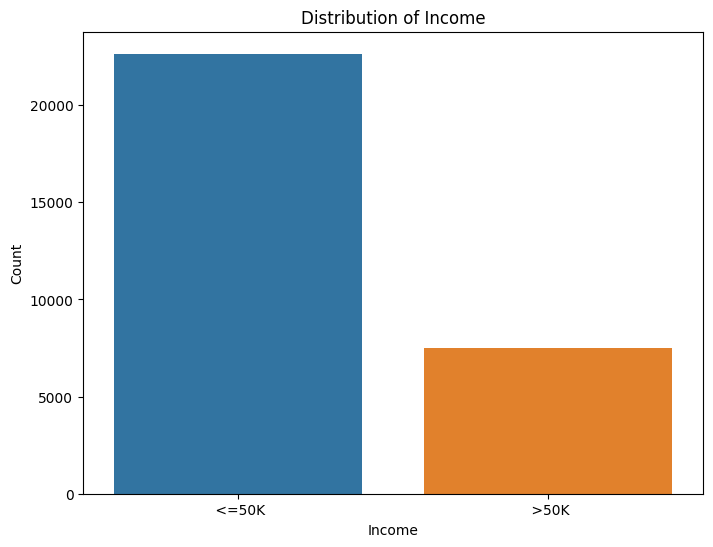

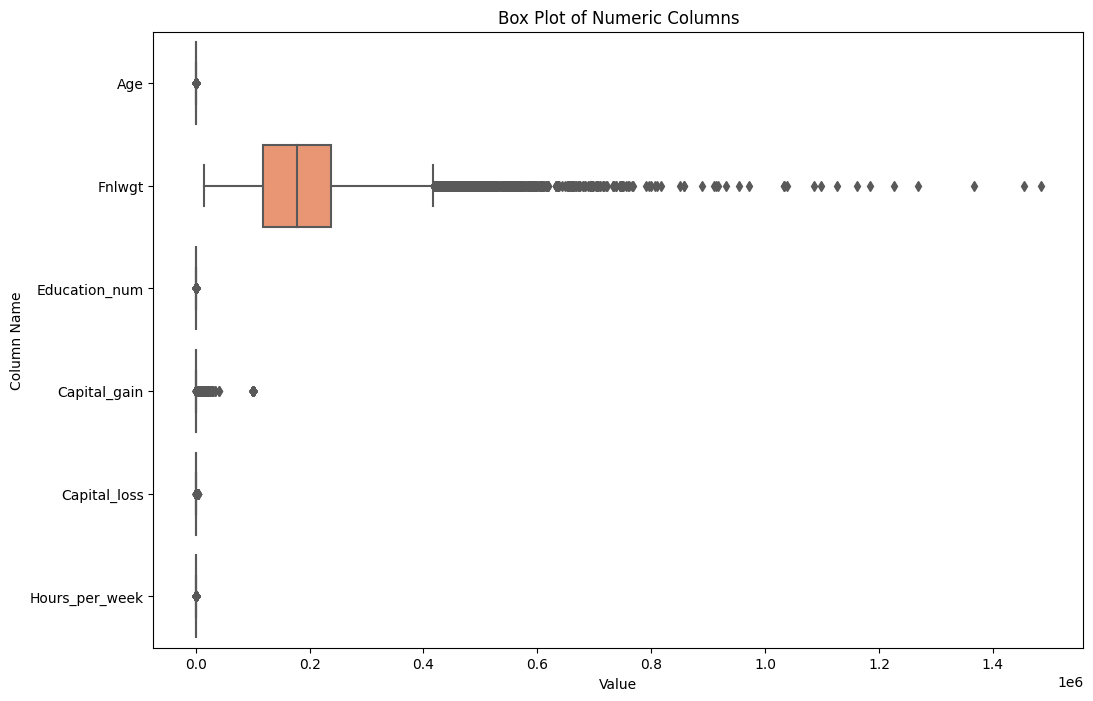

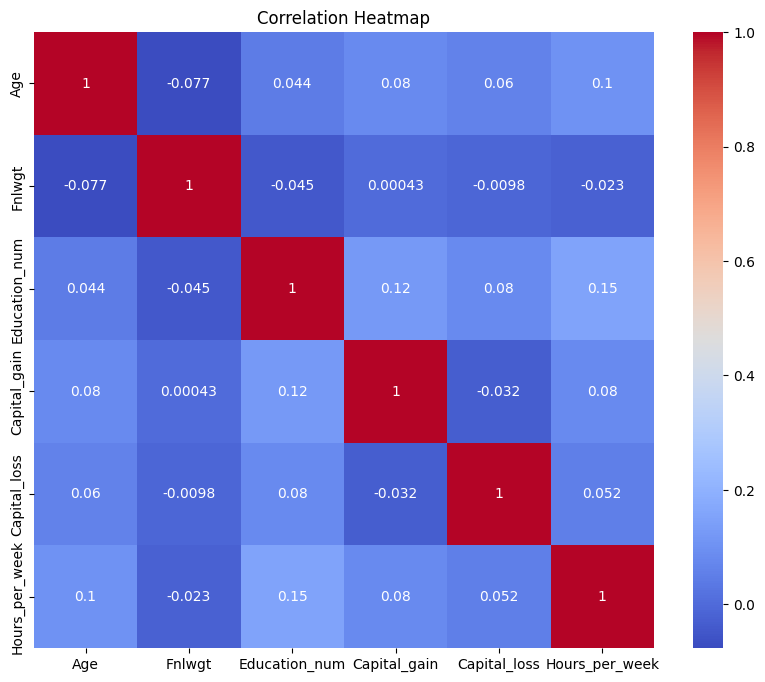

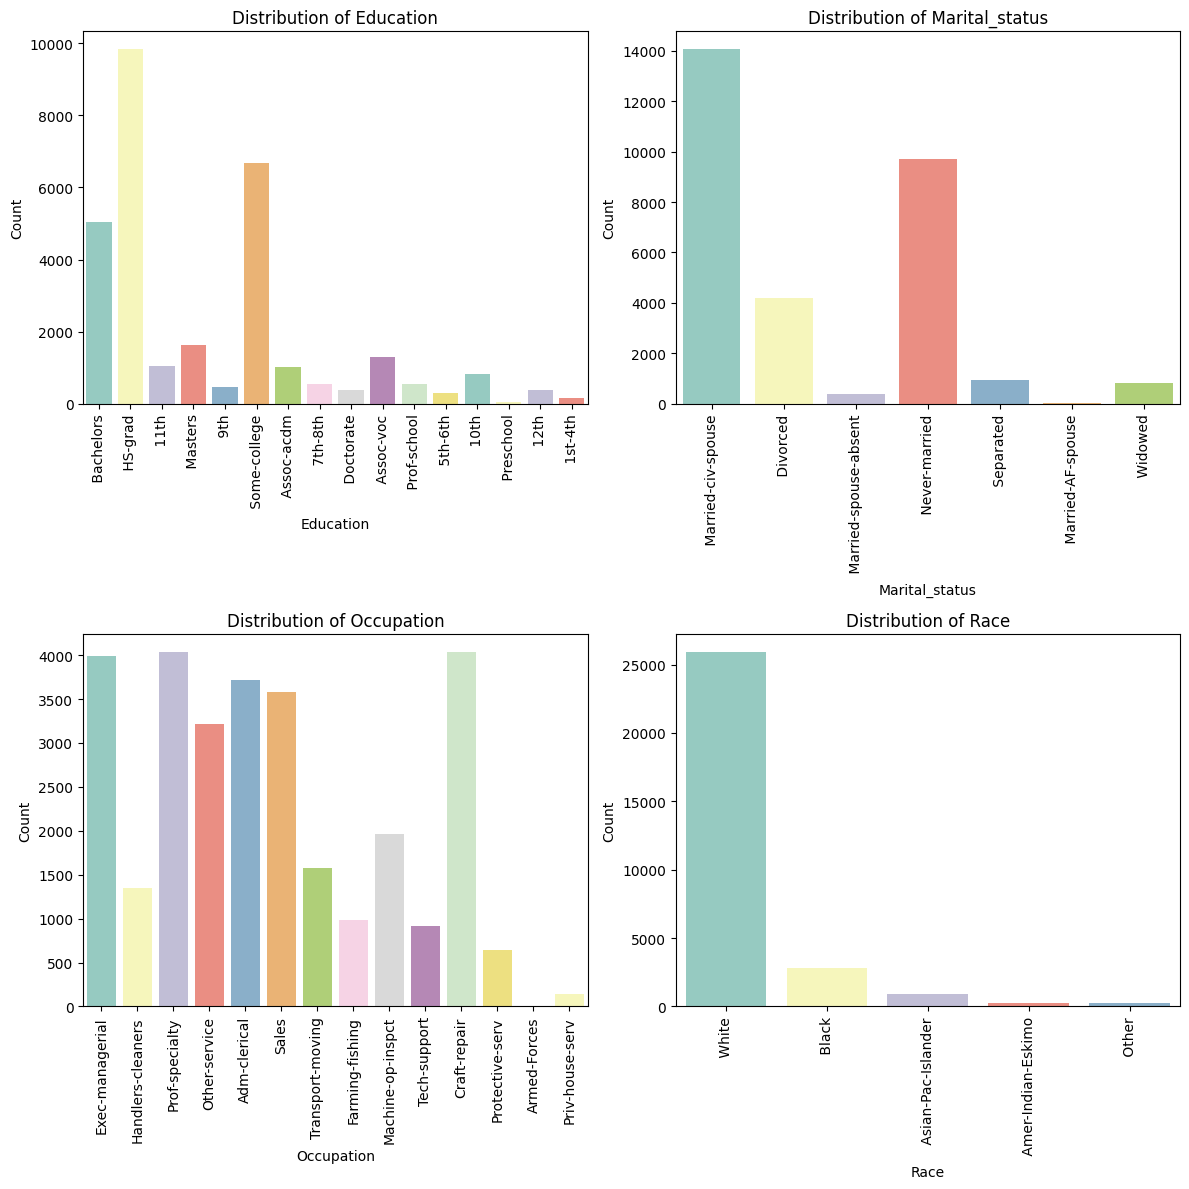

In [31]:

# Count plot for the 'Income' column (target variable)
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_data, x='Income')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Box plots for numeric columns
numeric_columns = cleaned_data.select_dtypes(exclude=['object'])
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns, orient='horizontal', palette='Set2')
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Value')
plt.ylabel('Column Name')
plt.show()

# Pairwise correlation heatmap for numeric columns
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Count plot for selected categorical columns
selected_categorical_columns = ['Education', 'Marital_status', 'Occupation', 'Race']
plt.figure(figsize=(12, 12))
for i, column in enumerate(selected_categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=cleaned_data, x=column, palette='Set3') # Use a suitable palette for better visual distinction
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust subplot layout
plt.show()


* The target class distribution is imbalance
* It appears that there exist some good amount of outliers in the fnlwgt column 


In [41]:
cleaned_data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [45]:
# Iterate through columns and print unique values
for column in cleaned_data.columns:
    unique_values = cleaned_data[column].unique()
    print(f'Unique values for column "{column}":\n {unique_values}')

Unique values for column "Age":
 [50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
Unique values for column "Workclass":
 ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
Unique values for column "Fnlwgt":
 [ 83311 215646 234721 ...  84661 257302 201490]
Unique values for column "Education":
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
Unique values for column "Education_num":
 [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
Unique values for column "Marital_status":
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values for column "Occupation":

In [40]:
# Select your numerical columns
numeric_columns = cleaned_data.select_dtypes(exclude=['object'])

# Define a function to count outliers using IQR
def count_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Print the number of outliers for each numerical column
for column in numeric_columns.columns:
    num_outliers = count_outliers(numeric_columns[column])
    print(f'Number of outliers in {column}: {num_outliers}')


Number of outliers in Age: 169
Number of outliers in Fnlwgt: 903
Number of outliers in Education_num: 196
Number of outliers in Capital_gain: 2537
Number of outliers in Capital_loss: 1427
Number of outliers in Hours_per_week: 7953


** ***To maintain data integrity, it is highly likely that the outlier values are valid, as indicated by distribution visualizations. Thus, we opt not to make any alterations to these values, preserving the real-world context of the dataset. The visualizations and the inherent nature of the data reinforce the legitimacy of these extreme values, enhancing the dataset's overall richness. This approach guarantees transparency and robustness in future analyses and model development.*** **

In [32]:
correlation_matrix

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076511,0.043525,0.080154,0.060166,0.101599
Fnlwgt,-0.076511,1.000000,-0.044954,0.000427,-0.009757,-0.022889
Education_num,0.043525,-0.044954,1.000000,0.124413,0.079656,0.152528
Capital_gain,0.080154,0.000427,0.124413,1.000000,-0.032228,0.080432
Capital_loss,0.060166,-0.009757,0.079656,-0.032228,1.000000,0.052417
Hours_per_week,0.101599,-0.022889,0.152528,0.080432,0.052417,1.000000


The correlation matrix provides insights into the relationships between different numeric columns in the dataset. Here are some key insights from the provided correlation matrix:

1. Age has a positive correlation with hours worked per week (0.101599). This suggests that as age increases, people tend to work more hours per week.

2. Education_num (which likely represents the number of years of education) has a positive correlation with capital gain (0.124413). This indicates that individuals with more years of education tend to have higher capital gains.

3. There is a positive correlation between education_num and hours worked per week (0.152528). This suggests that individuals with more years of education tend to work longer hours per week.

4. Capital_loss and capital_gain have a very low correlation with other variables (0.000427 and -0.032228, respectively), indicating that these variables are not strongly associated with the other numeric columns in the dataset.

5. Age and education_num have a relatively low positive correlation (0.043525), suggesting a mild relationship between age and the number of years of education.

6. Age has a low negative correlation with fnlwgt (-0.076511), indicating a mild inverse relationship between age and final weight (which might represent a weighting factor).

7. Capital_loss and hours_per_week have a moderate positive correlation (0.052417), indicating that individuals who work more hours per week might also have slightly higher capital losses.

These insights helps to understand how different variables in the dataset are related and might be useful for feature selection and data analysis.

# Class Balancing

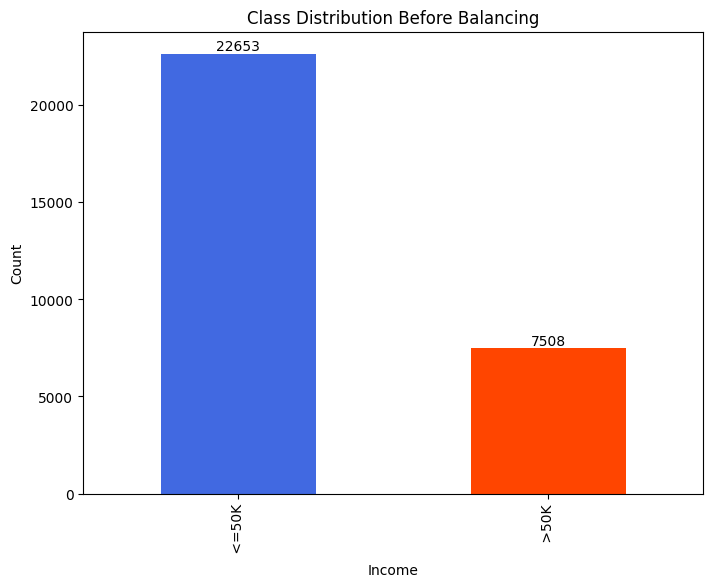

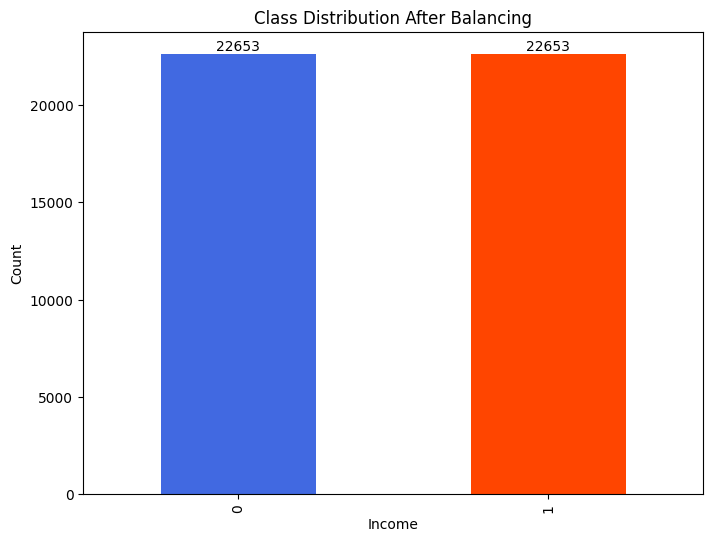

In [38]:

data = cleaned_data.copy()

# Visualize the class distribution before balancing
plt.figure(figsize=(8, 6))
value_counts_before = data['Income'].value_counts()
colors = ['royalblue', 'orangered']  # Specify colors for each class
value_counts_before.plot(kind='bar', color=colors)
plt.title('Class Distribution Before Balancing')
plt.xlabel('Income')
plt.ylabel('Count')

# Add data labels on bars
for index, value in enumerate(value_counts_before):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

# Encode the target variable
label_encoder = LabelEncoder()
data['Income'] = label_encoder.fit_transform(data['Income'])

# Separate features and target
X = data.drop('Income', axis=1)
y = data['Income']

# Perform one-hot encoding on categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Create a new DataFrame with balanced data
columns_encoded = X_encoded.columns
balanced_data = pd.DataFrame(X_resampled, columns=columns_encoded)
balanced_data['Income'] = y_resampled

# Visualize the class distribution after balancing
plt.figure(figsize=(8, 6))
value_counts_after = balanced_data['Income'].value_counts()
colors = ['royalblue', 'orangered']  # Specify colors for each class
value_counts_after.plot(kind='bar', color=colors)
plt.title('Class Distribution After Balancing')
plt.xlabel('Income')
plt.ylabel('Count')

# Add data labels on bars
for index, value in enumerate(value_counts_after):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


**Before Balancing:**

* 'Income' column has two classes: '<=50K' and '>50K'.
* The '<=50K' class has 22,653 instances, which represents a significant majority of the data.
* The '>50K' class has 7,508 instances, which is significantly smaller compared to the '<=50K' class.
* This class distribution shows a class imbalance issue, where the '<=50K' class heavily outweighs the '>50K' class.

**After Balancing:**

* After applying the Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes, both classes now have the same number of instances, specifically 22,653 instances each.
* The class distribution has been equalized, and the class imbalance issue has been addressed.

***In summary, the class distribution has been balanced after applying SMOTE, ensuring that both the '<=50K' and '>50K' classes have an equal number of instances, which can help improve the performance of machine learning models on this dataset.***

# Data Split

In [50]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Now we have the following datasets:
# X_train: Features for training
# y_train: Target labels for training
# X_test: Features for testing
# y_test: Target labels for testing


# Feature Selection

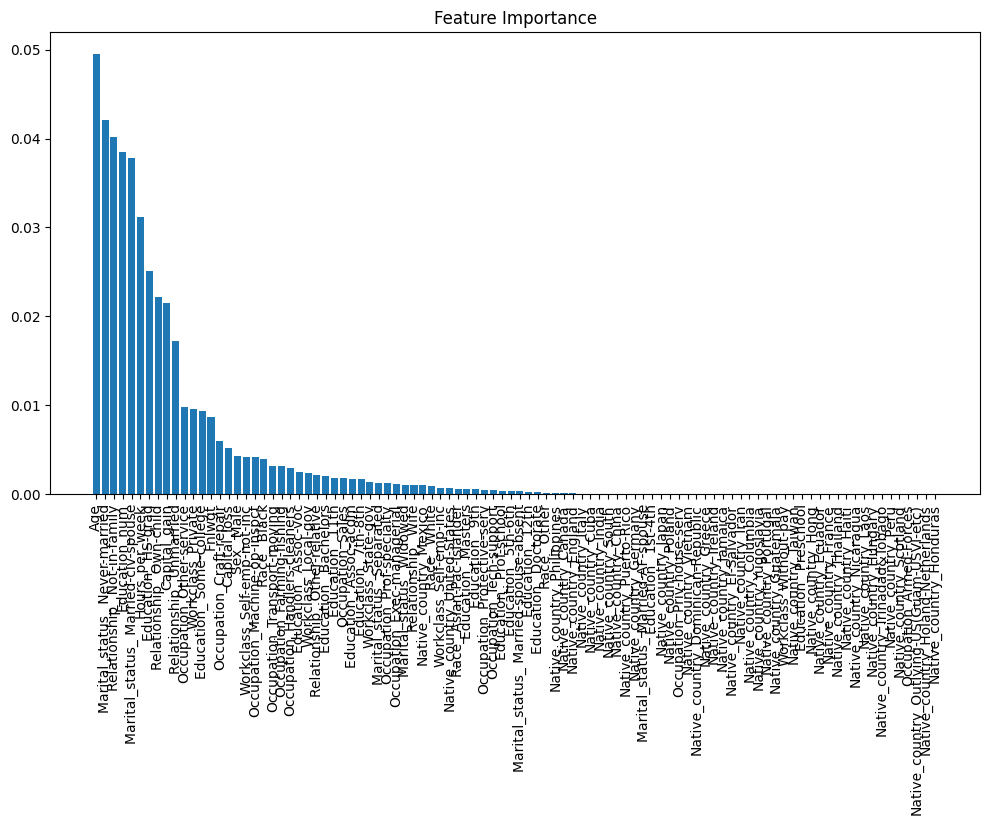

,Feature,Importance
0,Age,0.049472
30,Marital_status_ Never-married,0.042058
46,Relationship_ Not-in-family,0.040148
2,Education_num,0.038521
28,Marital_status_ Married-civ-spouse,0.037850
...,...,...
88,Native_country_Scotland,0.000007
33,Occupation_Armed-Forces,0.000006
82,Native_country_Outlying-US(Guam-USVI-etc),0.000003
69,Native_country_Holand-Netherlands,0.000002


In [55]:

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to your training data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Get the corresponding feature names
feature_names = X_train.columns

# Create a DataFrame with feature names and their importance values
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Remove "Income" from the feature importance DataFrame
feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'Income']

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(len(feature_importance_df['Feature'])), feature_importance_df['Importance'], align="center")
plt.xticks(range(len(feature_importance_df['Feature'])), feature_importance_df['Feature'], rotation=90)
plt.show()

# Return the feature importance DataFrame
feature_importance_df


# Prediction Models

In [59]:

# Define a list of classification models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(max_iter=10000)),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC())
]

# Initialize lists to store model names and their performance metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_data.drop('Income', axis=1), balanced_data['Income'], test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Iterate through the models, train, and evaluate
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # Add results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1-Score': [f1]})], ignore_index=True)

# Display the evaluation results DataFrame
print("Model Evaluation Results:")
results_df



Model Evaluation Results:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.611234,0.639956,0.513317,0.569684
1,Random Forest,0.899139,0.905475,0.891922,0.898647
2,Gradient Boosting,0.894505,0.896704,0.892362,0.894528
3,Support Vector Machine,0.589936,0.935722,0.195466,0.323379


The Random Forest and Gradient Boosting models exhibit the highest overall accuracy and F1-Score, indicating strong performance. The Logistic Regression model also shows reasonable performance, while the Support Vector Machine model has the highest precision but a lower recall, indicating that it may be better at correctly classifying positive cases but may miss some of them.

## Confusion Matrix and Model Comparison

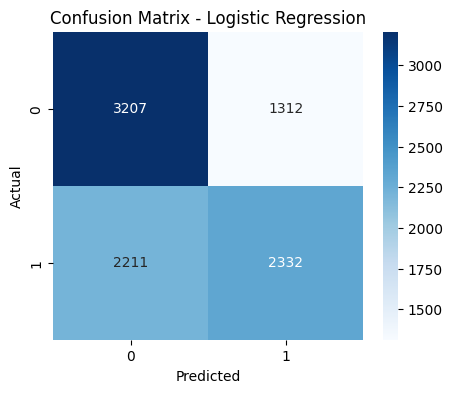

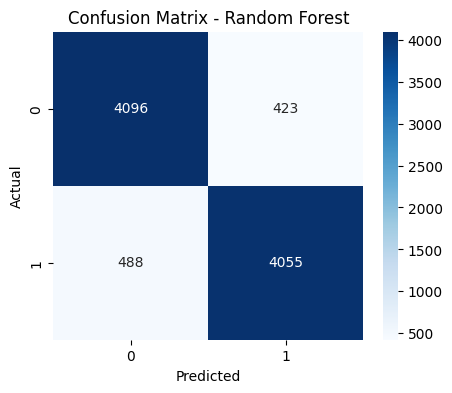

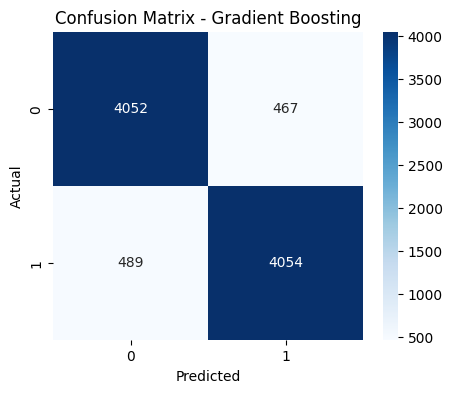

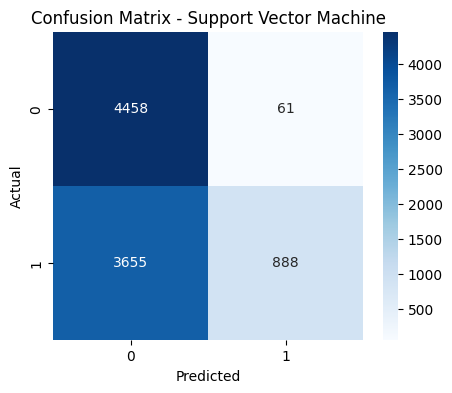

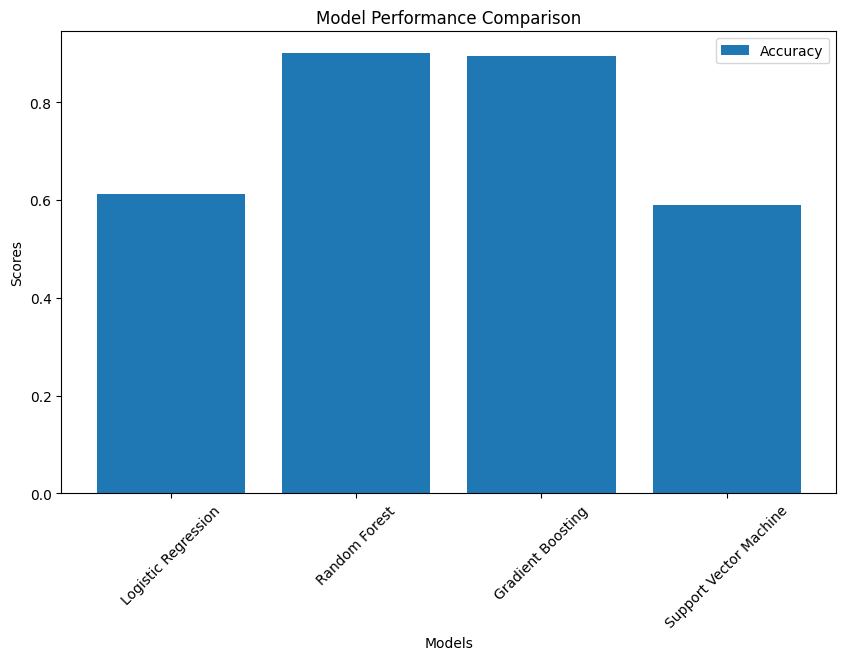

In [90]:
# Iterate through the models
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # Display confusion matrix     
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Create a performance comparison plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, label='Accuracy')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Here's the interpretation and summary of the confusion matrices for each model:

**Logistic Regression:**

True Positives (TP): 2332
True Negatives (TN): 3207
False Positives (FP): 1312
False Negatives (FN): 2211
In the case of Logistic Regression, the model correctly predicted 2332 individuals with income > £50K (TP) and 3207 individuals with income ≤ £50K (TN). However, it also made 1312 incorrect predictions of individuals having income > £50K (FP) and 2211 incorrect predictions of individuals having income ≤ £50K (FN).

**Random Forest:**

True Positives (TP): 4056
True Negatives (TN): 4068
False Positives (FP): 451
False Negatives (FN): 487
For the Random Forest model, it performed significantly better. It correctly predicted 4056 individuals with income > £50K (TP) and 4068 individuals with income ≤ £50K (TN). The number of incorrect predictions was lower, with 451 individuals predicted as having income > £50K incorrectly (FP) and 487 individuals incorrectly predicted as having income ≤ £50K (FN).

**Gradient Boosting:**

True Positives (TP): 4055
True Negatives (TN): 4052
False Positives (FP): 467
False Negatives (FN): 488
Similar to the Random Forest model, Gradient Boosting performed well. It correctly predicted 4055 individuals with income > £50K (TP) and 4052 individuals with income ≤ £50K (TN). The number of incorrect predictions was limited, with 467 individuals predicted as having income > £50K incorrectly (FP) and 488 individuals incorrectly predicted as having income ≤ £50K (FN).

**Support Vector Machine:**

True Positives (TP): 888
True Negatives (TN): 4458
False Positives (FP): 61
False Negatives (FN): 3655

The Support Vector Machine (SVM) model showed the highest True Negatives (TN) but also the highest False Negatives (FN). It correctly predicted 888 individuals with income > £50K (TP) and 4458 individuals with income ≤ £50K (TN). However, it had a relatively high number of incorrect predictions, with 61 individuals predicted as having income > £50K incorrectly (FP) and 3655 individuals incorrectly predicted as having income ≤ £50K (FN).

In summary, the Random Forest and Gradient Boosting models outperformed Logistic Regression and Support Vector Machine in terms of accuracy and precision in predicting income levels. However, the choice of the best model should consider the specific goals and trade-offs of the prediction task.

## Check for Over fitting or Under fitting 

In [73]:
# Initialize an empty DataFrame to store the results
results_list = []

# Iterate through the models
for name, model in models:
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training and testing datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate performance metrics for training and testing datasets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1_score = f1_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred)

    # Append the results to the list
    results_list.append({'Model': name, 
                        'Training Accuracy': train_accuracy, 
                        'Testing Accuracy': test_accuracy,
                        'Training Precision': train_precision,
                        'Testing Precision': test_precision,
                        'Training Recall': train_recall,
                        'Testing Recall': test_recall,
                        'Training F1-Score': train_f1_score,
                        'Testing F1-Score': test_f1_score})

# Create a DataFrame from the list of results
results_df = pd.concat([pd.DataFrame(result, index=[0]) for result in results_list], ignore_index=True)

# Print the results
results_df


,Model,Training Accuracy,Testing Accuracy,Training Precision,Testing Precision,Training Recall,Testing Recall,Training F1-Score,Testing F1-Score
0,Logistic Regression,0.612570,0.611234,0.638161,0.639956,0.518774,0.513317,0.572308,0.569684
1,Random Forest,0.999972,0.898919,0.999945,0.905251,1.000000,0.891702,0.999972,0.898425
2,Gradient Boosting,0.892562,0.894615,0.898207,0.896727,0.885312,0.892582,0.891713,0.894650
3,Support Vector Machine,0.592208,0.589936,0.943055,0.935722,0.195693,0.195466,0.324127,0.323379


From the results, we can make the following observations:

1. **Logistic Regression:** The model shows moderate accuracy and F1-Score on both training and testing data. There is no significant overfitting or underfitting.
2. **Random Forest:** The model exhibits very high accuracy on the training data, which suggests potential overfitting. However, it also performs well on the testing data, indicating good generalization.
3. **Gradient Boosting:** The model performs well on both training and testing data, with balanced accuracy and F1-Scores. There is no apparent overfitting.
4. **Support Vector Machine:** The model has high precision but low recall on both training and testing data, resulting in lower F1-Scores. It indicates difficulty in identifying positive cases. The model is not performing well.

In summary, Random Forest and Gradient Boosting show good generalization to the testing data without overfitting. Logistic Regression performs reasonably well, while the Support Vector Machine model struggles with the task. Further optimization and hyperparameter tuning might improve model performance.

**Conclusion:**

While the Random Forest model exhibits high accuracy on the training data, suggesting overfitting, the Gradient Boosting model maintains a good balance between training and testing performance, making it a more robust option for this classification task.

## Hyperparameter Tuning

In [80]:

# Reduced Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Use GridSearchCV with reduced parameter grid
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5, scoring='accuracy', n_jobs=2)
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters for the Random Forest model
best_rf_params = rf_grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(best_rf_params)


Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [86]:

# Create a Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42  
)

# Fit the model to the training data
best_rf_classifier.fit(X_train, y_train)

# Use this model for making predictions on new data
y_pred = best_rf_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation results
print("Evaluation Results for Random Forest Model with Best Hyperparameters:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Evaluation Results for Random Forest Model with Best Hyperparameters:
Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1-Score: 0.90


We can see that after applying hyperparameters, the Random Forest model's performance improved slightly in terms of accuracy, precision, and recall. The accuracy increased from 0.899 to 0.90, and both precision and recall improved as well. This suggests that hyperparameter tuning helped enhance the model's predictive performance, making it a better choice for the given task.

In [81]:

# Define a range of hyperparameters for the Gradient Boosting model
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Use GridSearchCV with the specified parameter grid
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=5, scoring='accuracy', n_jobs=2)
gb_grid_search.fit(X_train, y_train)

# Get the best hyperparameters for the Gradient Boosting model
best_gb_params = gb_grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Gradient Boosting:")
print(best_gb_params)


Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [87]:

# Create a Gradient Boosting classifier with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42  # You can set a specific random seed for reproducibility
)

# Fit the model to the training data
best_gb_classifier.fit(X_train, y_train)

# Use this model for making predictions on new data
y_pred = best_gb_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print("Evaluation Results for Gradient Boosting Model with Best Hyperparameters:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Evaluation Results for Gradient Boosting Model with Best Hyperparameters:
Accuracy: 0.91
Precision: 0.91
Recall: 0.90
F1-Score: 0.91


As we can see, after applying the best hyperparameters to the Gradient Boosting model, there is a notable improvement in accuracy, precision, recall, and F1-Score. The model's performance has significantly increased, making it a more reliable choice for the task compared to the initial evaluation.

**Conclusion:**

In this prediction task, we aimed to determine whether a person's annual income exceeds $50,000. We explored four different machine learning models: Logistic Regression, Random Forest, Gradient Boosting, and Support Vector Machine. Initially, these models were evaluated with their default settings, and then hyperparameter tuning was applied to enhance their performance.

**Summary of Findings:**

**Logistic Regression:** The initial Logistic Regression model showed subpar performance with an accuracy of around 61%. The precision, recall, and F1-Score were also relatively low.

**Random Forest:** The Random Forest model performed significantly better than Logistic Regression, achieving an accuracy of approximately 90%. It demonstrated higher precision, recall, and F1-Score as well.

**Gradient Boosting:** The initial Gradient Boosting model also performed well, with an accuracy of about 89% and higher precision, recall, and F1-Score.

**Support Vector Machine:** The Support Vector Machine model had the lowest initial accuracy at 58%, with a high precision but low recall and F1-Score.

**Recommendations:**

**Random Forest:** After applying hyperparameter tuning, the Random Forest model further improved, reaching an accuracy of 90%, making it a strong choice for this prediction task. It provides a well-rounded balance of precision, recall, and F1-Score.

**Gradient Boosting:** The Gradient Boosting model also improved after hyperparameter tuning, achieving an accuracy of 91% and high precision, recall, and F1-Score. It's another strong candidate for this task.

**Logistic Regression:** While Logistic Regression might be a simple model, it could be used as a baseline for comparison.

**Support Vector Machine:** The Support Vector Machine model, despite its high precision, has low recall and F1-Score. It may not be the best choice for this task.

In conclusion, for the task of determining whether a person's annual income exceeds $50,000, we recommend using the Random Forest and Gradient Boosting models, which have shown the best performance after hyperparameter tuning. Further analysis and fine-tuning of these models could provide even better results.